<table style="width:100%">
    <tr>
        <td>
            <a href="http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.html">
  <img src="../../svg/view-html.svg" alt="View HTML"/>
            </a>
        </td>
        <td>
<a href="https://github.com/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.ipynb">
  <img src="../../svg/open-github.svg" alt="Open In GitHub"/>
            </a>
        </td>
        <td>
            <a href="https://colab.research.google.com/github/vvkisil/MoebInv-notebooks/blob/master/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.ipynb">
  <img src="../../svg/exec-colab.svg" alt="Run In Colab"/>
            </a>
        </td>
        <td>
            <a href="https://codeocean.com/capsule/7952650/tree">
  <img src="../../svg/code-ocean.svg" alt="Code Ocean"/>
            </a>
        </td>
    </tr>
 </table>

# Start from the basics: What is a cycle relation, anyway?
### [Vladimir V Kisil](http://www1.maths.leeds.ac.uk/~kisilv/)

We use name *cycles* to denote quadrics. On a plane they are circles, parabolas and hyperbolas (together with limiting cases: straight lines and points). See [What is cycle](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle.html) for an introduction.

Beauty of cycles multiplies when we arrange them into interrelated construction, which are called [*figures*](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_figure.html) here. Within a figure different cycles may be connected by *cycle relations*, which are introduced in this notebook. 

**Note:** *to execute the notebook you may need to [install software](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Introduction/Software_installation_GUI_integration.html).* 

<a id="ToC"></a>
#### Table of contents of this notebook

+ [Constructing with compass, construction with MoebInv](#constructingCompass)
+ [Executive summary](#executiveSummary)
+ [Further reading](#furtherReading)
+ [References](#references)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/Table_of_contents.md).

<a id="constructingCompass"></a>
## Constructing with compass, construction with MoebInv

We will illustrate the idea of cycle relations through the comparison with the classical geometric constructions by compass & straightedge. It turns out that quite a lot can be done using just the relation of [*cycle orthogonality*](https://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.html#aboutOrthogonality)

First we initialise our digital scratchpad. 

In [1]:
from figure import *
from IPython.display import Image
show_asy_off()

            Python wrappers for MoibInv Library
     ---------------------------------------------
Please cite this software as
V.V. Kisil, MoebInv: C++ libraries for manipulations in non-Euclidean geometry, SoftwareX, 11(2020),100385. doi:10.1016/j.softx.2019.100385.
     ---------------------------------------------



Then we start a figure and place to random thee points `A`, `B` and `C`:

In [2]:
F=figure()
A=F.add_point([-2,-1], "A")
B=F.add_point([1,1], "B")
C=F.add_point([0,2], "C")

Here we store in variables `A`, `B` and `C` keys to the newly placed cycles representing those points. They will be used to indicate the *parent* for a particular relation.

Let us visualise the figure to see our work:

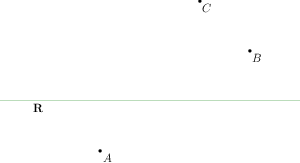

In [3]:
F.asy_write(300,-4,2,-3,3,"relations1","png")
Image("relations1.png")

How to draw a cycle passing these three points? With compass & straightedge it requires some intermediate steps. In Lie spheres geometry you need only to tell that the new cycle shall be orthogonal to the three cycles representing those points. Thus we create a cycle by specifying a list with three relations and a label for the new cycle:

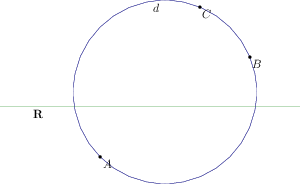

In [4]:
d=F.add_cycle_rel([is_orthogonal(A), is_orthogonal(B), is_orthogonal(C)], "d")
F.asy_write(300,-4,2,-3,3,"relations2","png")
Image("relations2.png")

Let us now add two more arbitrary points:

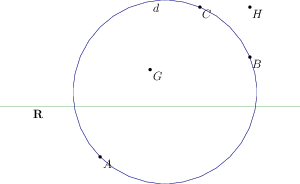

In [5]:
G=F.add_point([-1,0.75], "G")
H=F.add_point([1,2], "H")
F.asy_write(300,-4,2,-3,3,"relations3","png")
Image("relations3.png")

How to draw a line through these two points? A straight line is a cycle which passes the infinity, thus we have again have a list of three orthogonality conditions:

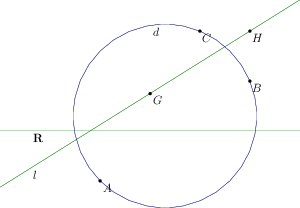

In [6]:
l=F.add_cycle_rel([is_orthogonal(G), is_orthogonal(H), is_orthogonal(F.get_infinity())], "l")
F.asy_write(300,-4,2,-3,3,"relations4","png")
Image("relations4.png")

Another typical task is to identify the intersection points, say, for the cycle `c` and the kine `l`. The intersection shall be orthogonal to these two cycles. Also, as a point it shall be orthogonal to itself. The self-reference can be specified either as `is_orthogonal()` (the parent is ommited) or `is_orthogonal(0)` (a dummy zero parent is provided). Let us try: 

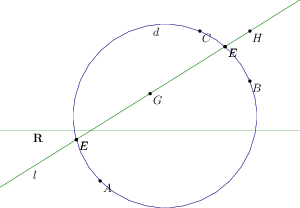

In [7]:
E=F.add_cycle_rel([is_orthogonal(d), is_orthogonal(l), is_orthogonal()], "E")
F.asy_write(300,-4,2,-3,3,"relations5","png")
Image("relations5.png")

We got two intersections, but they are under the same roof `E`. To access then individually, we split `E` through `with_index()` relation. It shall name the parent and provide the parameter—the number of particular cycle in a given node. Note that indexes start their numbering from $0$:  

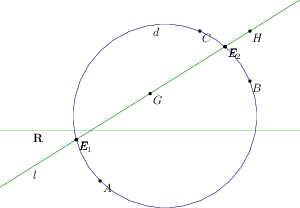

In [8]:
E1=F.add_cycle_rel([with_index(E,0)], "E1")
E2=F.add_cycle_rel([with_index(E,1)], "E2")
F.asy_write(300,-4,2,-3,3,"relations6","png")
Image("relations6.png")

Now we can use these two different points `E1` and `E2` to build a cycle with the diameter $E_1E_2$:

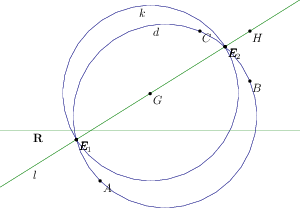

In [9]:
k=F.add_cycle_rel([is_orthogonal(E1), is_orthogonal(E2), is_orthogonal(l)], "k")
F.asy_write(300,-4,2,-3,3,"relations7","png")
Image("relations7.png")

[Back to ToC](#ToC)

<a id="executiveSummary"></a>
## Executive summary

A new cycle can be added to a figure by specifying a list of its relation to other cycles—either already existing or the new cycle itself. In this way we can avoid vicious loops. Thus the concept of a cycle relation is central to this software.

A cycle relation from MoebInv library belongs to one of the following three categories:

+ *Characterising* a geometric property through one or several equations on new cycle’s coefficients—it is typically used in a list with others relations. The most fundamental example is [*orthogonality*](https://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_cycle_product.html#aboutOrthogonality), see the above example.

+ *Constructing* a new cycle—it is used alone or with choosing relations from the next category. An example is a reflection in a cycle.

+ *Choosing* a cycle by certain condition, e.g. either its all coefficients are real numbers. Such relations are usually not used themselves, rather they may complement relations of the first two categories.

Thereafter, a meaningful list of relations to define a new cycle has the form:

**(some characterising *or* single constructing) *and* optional choosing relation(s)**

The order of relations in the list is not important. Some relations (at any category) may need additional parameter(s) (real or Clifford numbers).

All relations except two choosing—"*Only Real coefficients*"  and "*Only Numeric coefficients*"—link a new cycle to other cycle(s).

Five relations—"*Orthogonal*", "*f-Orthogonal*", "*Two cycle product ratio*", "*Only Real coefficients*" and "*Only Numeric coefficients*"—can meaningfully link a new cycle to itself. To this end they can be used without a parent or with dummy zero parent (see the intersection point example above)

[Back to ToC](#ToC)

<a id="furtherReading"></a>
## Further Reading

More detailed description of all available cycle relations can be found [on-line](http://moebinv.sourceforge.net/moebinv-gui-manual-whole003.html).

However, already presented relations are sufficient to build various meaningful [*figures*](http://www1.maths.leeds.ac.uk/~kisilv/MoebInv-notebooks/Geometry_of_cycles/Start_from_Basics/What_is_figure.html). 

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/Table_of_contents.md).

<a id="references"></a>
### References

   <a id="refKisil07"></a>
1. V.V. Kisil. *Starting with the group SL2(R).* Notices Amer. Math. Soc., [**54**(11):1458–1465](http://www.ams.org/notices/200711/tx071101458p.pdf), 2007. [arXiv:math/0607387](https://arxiv.org/abs/math/0607387), Zbl # 1137.22006.

  <a id="refKisil12"></a>
2. V.V. Kisil. *Geometry of Möbius Transformations: Elliptic, Parabolic and Hyperbolic Actions of $SL_2(\mathbb{R})$*. [Imperial College Press](https://www.worldscientific.com/worldscibooks/10.1142/p835), London, 2012. Includes a live DVD.

  <a id="refKisilMN"></a>
3. V.V. Kisil, [*MoebInv notebooks*](https://github.com/vvkisil/MoebInv-notebooks), stated at 2019.

   <a id="refKisil18"></a>
4. V. V. Kisil. An extension of Mobius–Lie geometry with conformal ensembles of cycles and its implementation in a GiNaC library. Proc. Int. Geom. Cent., 11 (3):45–67, 2018. E-print: [arXiv:1512.02960](https://arxiv.org/abs/1512.02960). Project page: http://moebinv.sourceforge.net/.

   <a id="refKisil19"></a>
5. V. V. Kisil. Möbius–Lie geometry and its extension. In I. M. Mladenov, G. Meng, and A. Yoshioka (eds.) Geometry, integrability and quantization XX, pages 13–61, Bulgar. Acad. Sci., Sofia, 2019. E-print: [arXiv:1811.10499](https://arxiv.org/abs/1811.10499).

  <a id="refKisil20"></a>
6.  V. V. Kisil. *MoebInv: C++ libraries for manipulations in non-Euclidean geometry*. SoftwareX, **11**:100385, 2020. doi: [10.1016/j.softx.2019.100385](http://dx.doi.org/10.1016/j.softx.2019.100385).

[Back to ToC](#ToC)

Back to the [top-level Table of Contents](https://github.com/vvkisil/MoebInv-notebooks/blob/master/Table_of_contents.md).